In [119]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/sleep_health_clean.csv',sep=';')

Shape of data

In [120]:
data.shape

(374, 14)

Feature datatypes

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Person ID                 374 non-null    int64  
 1   Gender                    374 non-null    object 
 2   Age                       374 non-null    int64  
 3   Occupation                374 non-null    object 
 4   Sleep Duration            374 non-null    float64
 5   Quality of Sleep          374 non-null    int64  
 6   Physical Activity Level   374 non-null    int64  
 7   Stress Level              374 non-null    int64  
 8   BMI Category              374 non-null    object 
 9   Systolic Blood Pressure   374 non-null    int64  
 10  Diastolic Blood Pressure  374 non-null    int64  
 11  Heart Rate                374 non-null    int64  
 12  Daily Steps               374 non-null    int64  
 13  Sleep Disorder            155 non-null    object 
dtypes: float64

Drop ID column

In [122]:
data.drop(columns=['Person ID'], inplace=True)

Number of target classes

In [123]:
insomnia_cases = len(np.where(data['Sleep Disorder'] == 'Insomnia')[0])
sleep_apnea_cases = len(np.where(data['Sleep Disorder'] == 'Sleep Apnea')[0])
healthy = len(data) - insomnia_cases - sleep_apnea_cases

print("Number of \nHealthy: {}\nInsomnia: {}\nSleep apnea: {}".format(healthy,insomnia_cases,sleep_apnea_cases))

Number of 
Healthy: 219
Insomnia: 77
Sleep apnea: 78


In [124]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

Descriptive statistics

In [125]:
data[numerical_cols].describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,128.553476,84.649733,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,7.748118,6.161611,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,115.000000,75.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,125.000000,80.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,130.000000,85.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,135.000000,90.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,142.000000,95.000000,86.000000,10000.000000


NAs, uniques and normality of numeric features

In [126]:
for col in data:
    print(col)
    print('NAs: '+str(sum(data[col].isna())))
    print('Uniques values: '+str(len(data[col].unique())))
    print('+'*30)

Gender
NAs: 0
Uniques values: 2
++++++++++++++++++++++++++++++
Age
NAs: 0
Uniques values: 31
++++++++++++++++++++++++++++++
Occupation
NAs: 0
Uniques values: 11
++++++++++++++++++++++++++++++
Sleep Duration
NAs: 0
Uniques values: 27
++++++++++++++++++++++++++++++
Quality of Sleep
NAs: 0
Uniques values: 6
++++++++++++++++++++++++++++++
Physical Activity Level
NAs: 0
Uniques values: 16
++++++++++++++++++++++++++++++
Stress Level
NAs: 0
Uniques values: 6
++++++++++++++++++++++++++++++
BMI Category
NAs: 0
Uniques values: 4
++++++++++++++++++++++++++++++
Systolic Blood Pressure
NAs: 0
Uniques values: 18
++++++++++++++++++++++++++++++
Diastolic Blood Pressure
NAs: 0
Uniques values: 17
++++++++++++++++++++++++++++++
Heart Rate
NAs: 0
Uniques values: 19
++++++++++++++++++++++++++++++
Daily Steps
NAs: 0
Uniques values: 20
++++++++++++++++++++++++++++++
Sleep Disorder
NAs: 219
Uniques values: 3
++++++++++++++++++++++++++++++


Set NAs to be a factor

In [127]:
data["Sleep Disorder"] = data["Sleep Disorder"].replace([None], "None")
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
2,Male,31,Doctor,6.1,6,30,8,Normal,125,80,72,5000,None
3,Male,31,Doctor,6.1,6,30,8,Normal,125,80,72,5000,None
4,Male,31,Doctor,6.1,6,30,8,Normal,125,80,72,5000,None


Corrplot

<Axes: >

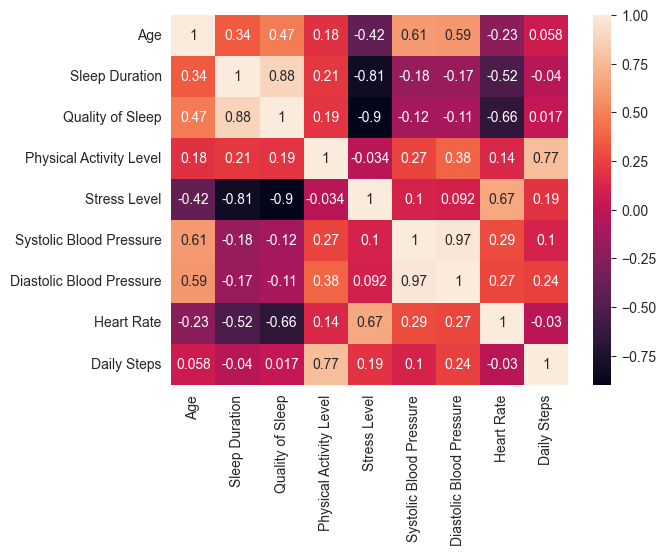

In [129]:
import seaborn as sns

sns.heatmap(data[numerical_cols].corr(), annot=True)

Systolic and diastolic blood pressure are highly correlated, but systolic is more important, diastolic should be dropped

Physical activity level and daily steps are highly correlated, daily steps should be dropped

Stress level and Quality of sleep are highly negatively correlated, stress level should be dropped

Sleep duration and Quality of sleep are highly negatively correlated, Sleep duration should be dropped